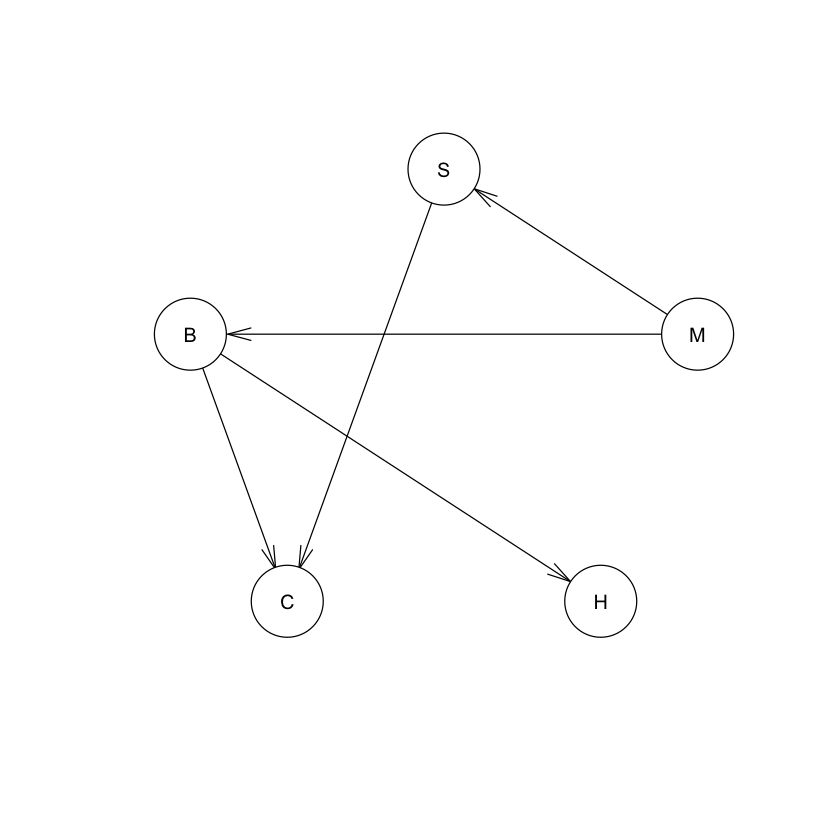

In [3]:
#install.packages("bnlearn")
library("bnlearn")
bnet <- "[M][S|M][B|M][C|S:B][H|B]"
net = model2network(bnet)
plot(net)

In [7]:
cptM <- matrix(c(0.9, 0.1), ncol = 2, dimnames = list(NULL, "M" = c("TRUE", "FALSE")))
cptS <- matrix(c(0.2, 0.8, 0.05, 0.95), ncol = 2, dimnames = list("S" = c("TRUE", "FALSE"), "M" = c("TRUE", "FALSE")))
cptB <- matrix(c(0.8, 0.2, 0.2, 0.8), ncol = 2, dimnames = list("B" = c("TRUE", "FALSE"), "M" = c("TRUE", "FALSE")))

cptC <- c(0.8, 0.2, 0.8, 0.2, 0.8, 0.2, 0.05, 0.95)
dim(cptC) <- c(2, 2, 2)
dimnames(cptC) = list("C" = c("TRUE", "FALSE"), "S" =  c("TRUE", "FALSE"), "B" = c("TRUE", "FALSE"))

cptH <- matrix(c(0.8, 0.2, 0.6, 0.4), ncol = 2, dimnames = list("H" = c("TRUE", "FALSE"), "B" = c("TRUE", "FALSE")))

cptM
cat("P(Metastatic Cancer)")

cptS
cat("P(Increased Total Serum Calcium)")

cptB
cat("P(Brain Tumor)")

cptC
cat("P(Coma)")

cptH
cat("P(Severe Headaches)")

TRUE,FALSE
0.9,0.1


P(Metastatic Cancer)

,TRUE,FALSE
TRUE,0.2,0.05
FALSE,0.8,0.95


P(Increased Total Serum Calcium)

,TRUE,FALSE
TRUE,0.8,0.2
FALSE,0.2,0.8


P(Brain Tumor)

, , B = TRUE

       S
C       TRUE FALSE
  TRUE   0.8   0.8
  FALSE  0.2   0.2

, , B = FALSE

       S
C       TRUE FALSE
  TRUE   0.8  0.05
  FALSE  0.2  0.95

P(Coma)

,TRUE,FALSE
TRUE,0.8,0.6
FALSE,0.2,0.4


P(Severe Headaches)

In [8]:
dfit = custom.fit(net, dist = list(M=cptM, S=cptS, B=cptB, C=cptC, H=cptH))

In [9]:
# Given that the person has a headache, what is the probability of Metastatic Cancer?
cpquery(dfit, M=="TRUE", H=="TRUE", n=1e6) 
# I have frequent migraines. Did you really meant a-priori probability as 0.9? :) 
# I need to talk to my doctor 

[1] 0.9147409

In [10]:
# If person does not have a metastatic cancer, what is the probability they have coma?
cpquery(dfit, C=="TRUE", M=="FALSE", n=1e6)

[1] 0.2301974

In [11]:
# Given that the person has a Severe Headache, what is the probability of Increased total serum calcium?
cpquery(dfit, S=="TRUE", H=="TRUE", n=1e6)

[1] 0.1865799

TRUE,FALSE
0.2,0.8


P(Smoking)

,TRUE,FALSE
TRUE,0.3,0.1
FALSE,0.7,0.9


P(Metastatic cancer)

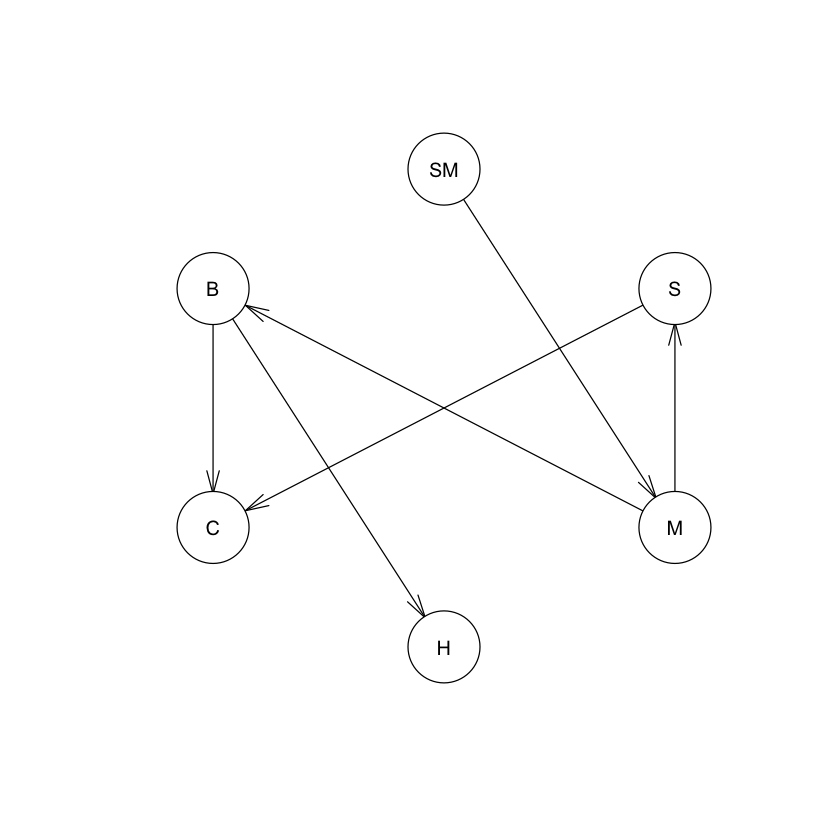

In [13]:
# Research has shown that smoking results in Metastatic Cancer 30% 
# of the time. Given this information, update the network (just show 
# how you would draw the new arrow(s)). Draw conditional probability 
# table for Metastatic Cancer, assuming that prior probabilities
# P(S=T) = 20% and P(M=T) = 10% (i.e. do not use P(M=T) = 0.9 
# or R in this question)

net.str.update <- "[SM][M|SM][S|M][B|M][C|S:B][H|B]"
net.update = model2network(net.str.update)
plot(net.update)

cptSM <- matrix(c(0.2, 0.8), ncol = 2, dimnames = list(NULL, "SM" = c("TRUE", "FALSE")))
cptMNew <- matrix(c(0.3, 0.7, 0.1, 0.9), ncol = 2, dimnames = list("M" = c("TRUE", "FALSE"), "Sk" = c("TRUE", "FALSE")))

cptSM
cat("P(Smoking)")


cptMNew
cat("P(Metastatic cancer)")